# Automatic Virus Test Kits

The fast automatic test kits lab is asking for help. The lab already developed a fast virus
test kit that can automate the testing of a certain virus. What they need help with is to
improve the performance of their test kit in terms of recall and precision.

The test kit can automatically take 25 different measurements. The reading of the first
measurement x1 is categorical. The rest of the readings x2 to x25 are numerical.
The lab provided us a training set of 7, 500 samples, and a test set of 2, 500 samples. The
data sets are in the form of .csv files. The file names are train.csv and test.csv respectively.
In both data sets, the last column y is the label of a sample, where value 1 means positive,
and value 0 means negative. A positive label indicates the sample is from a patient infected
by the virus.

Our job is to use the training data to train a classifier that can achieve 98.5% recall and at
least 97.5% of precision.

Once we are convinced that we have a classifier that can achieve this goal, we use the test
data set to test whether we indeed can achieve these requirements in the test data set.

## 1. Read train.csv file.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2. Obtain the high level information of the dataset.

In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7500 non-null   float64
 1   x2      7500 non-null   float64
 2   x3      7500 non-null   float64
 3   x4      7500 non-null   float64
 4   x5      7500 non-null   float64
 5   x6      7500 non-null   float64
 6   x7      7500 non-null   float64
 7   x8      7500 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7500 non-null   float64
 10  x11     7500 non-null   float64
 11  x12     7500 non-null   float64
 12  x13     7500 non-null   float64
 13  x14     7500 non-null   float64
 14  x15     7500 non-null   float64
 15  x16     7500 non-null   float64
 16  x17     7500 non-null   float64
 17  x18     7500 non-null   float64
 18  x19     7500 non-null   float64
 19  x20     7500 non-null   float64
 20  x21     7500 non-null   float64
 21  x22     7500 non-null   float64
 22  

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.843067,0.051517,0.168138,0.216066,0.350962,0.472082,0.500805,0.721626,0.766948,0.818067,...,1.279188,1.896591,1.639105,2.102971,2.231801,-0.012986,0.029115,-0.008393,-0.000845,0.502933
std,0.853621,0.797982,1.577992,2.367254,3.156170,3.899687,4.788771,5.619513,6.349189,7.188440,...,12.703391,13.265546,13.899751,15.031612,15.629652,0.993627,1.002972,0.991703,0.995305,0.500025
min,1.000000,-3.317763,-6.031931,-10.497184,-15.597329,-16.667881,-18.318668,-25.862462,-26.907451,-29.242184,...,-56.916811,-61.961221,-62.344680,-55.443448,-70.544154,-3.729174,-3.792422,-4.003598,-4.413886,0.000000
25%,1.000000,-0.423681,-0.758705,-1.165111,-1.506647,-1.772049,-2.290082,-2.511824,-2.967126,-3.377580,...,-6.057632,-5.867732,-6.586638,-6.794115,-7.145656,-0.684431,-0.647845,-0.666472,-0.669748,0.000000
50%,2.000000,0.039337,0.115522,0.188675,0.372663,0.511524,0.522869,0.670736,0.829468,0.773383,...,1.355423,1.931477,1.735362,1.870309,2.290904,-0.003062,0.027475,-0.011923,-0.008219,1.000000
75%,3.000000,0.504788,1.087809,1.594673,2.209389,2.781103,3.242105,4.038845,4.492607,5.006287,...,8.867802,9.669442,9.868522,10.971638,11.341827,0.645228,0.700667,0.649573,0.681323,1.000000
max,3.000000,3.717462,6.617456,11.496319,14.174944,19.039526,20.006664,24.423756,25.982852,30.435956,...,58.378918,56.667929,66.959747,77.460496,65.621669,3.329855,3.605568,3.863906,3.558600,1.000000


## 3. Plot histograms of all the attributes.

Saving figure attribute_histogram_plots


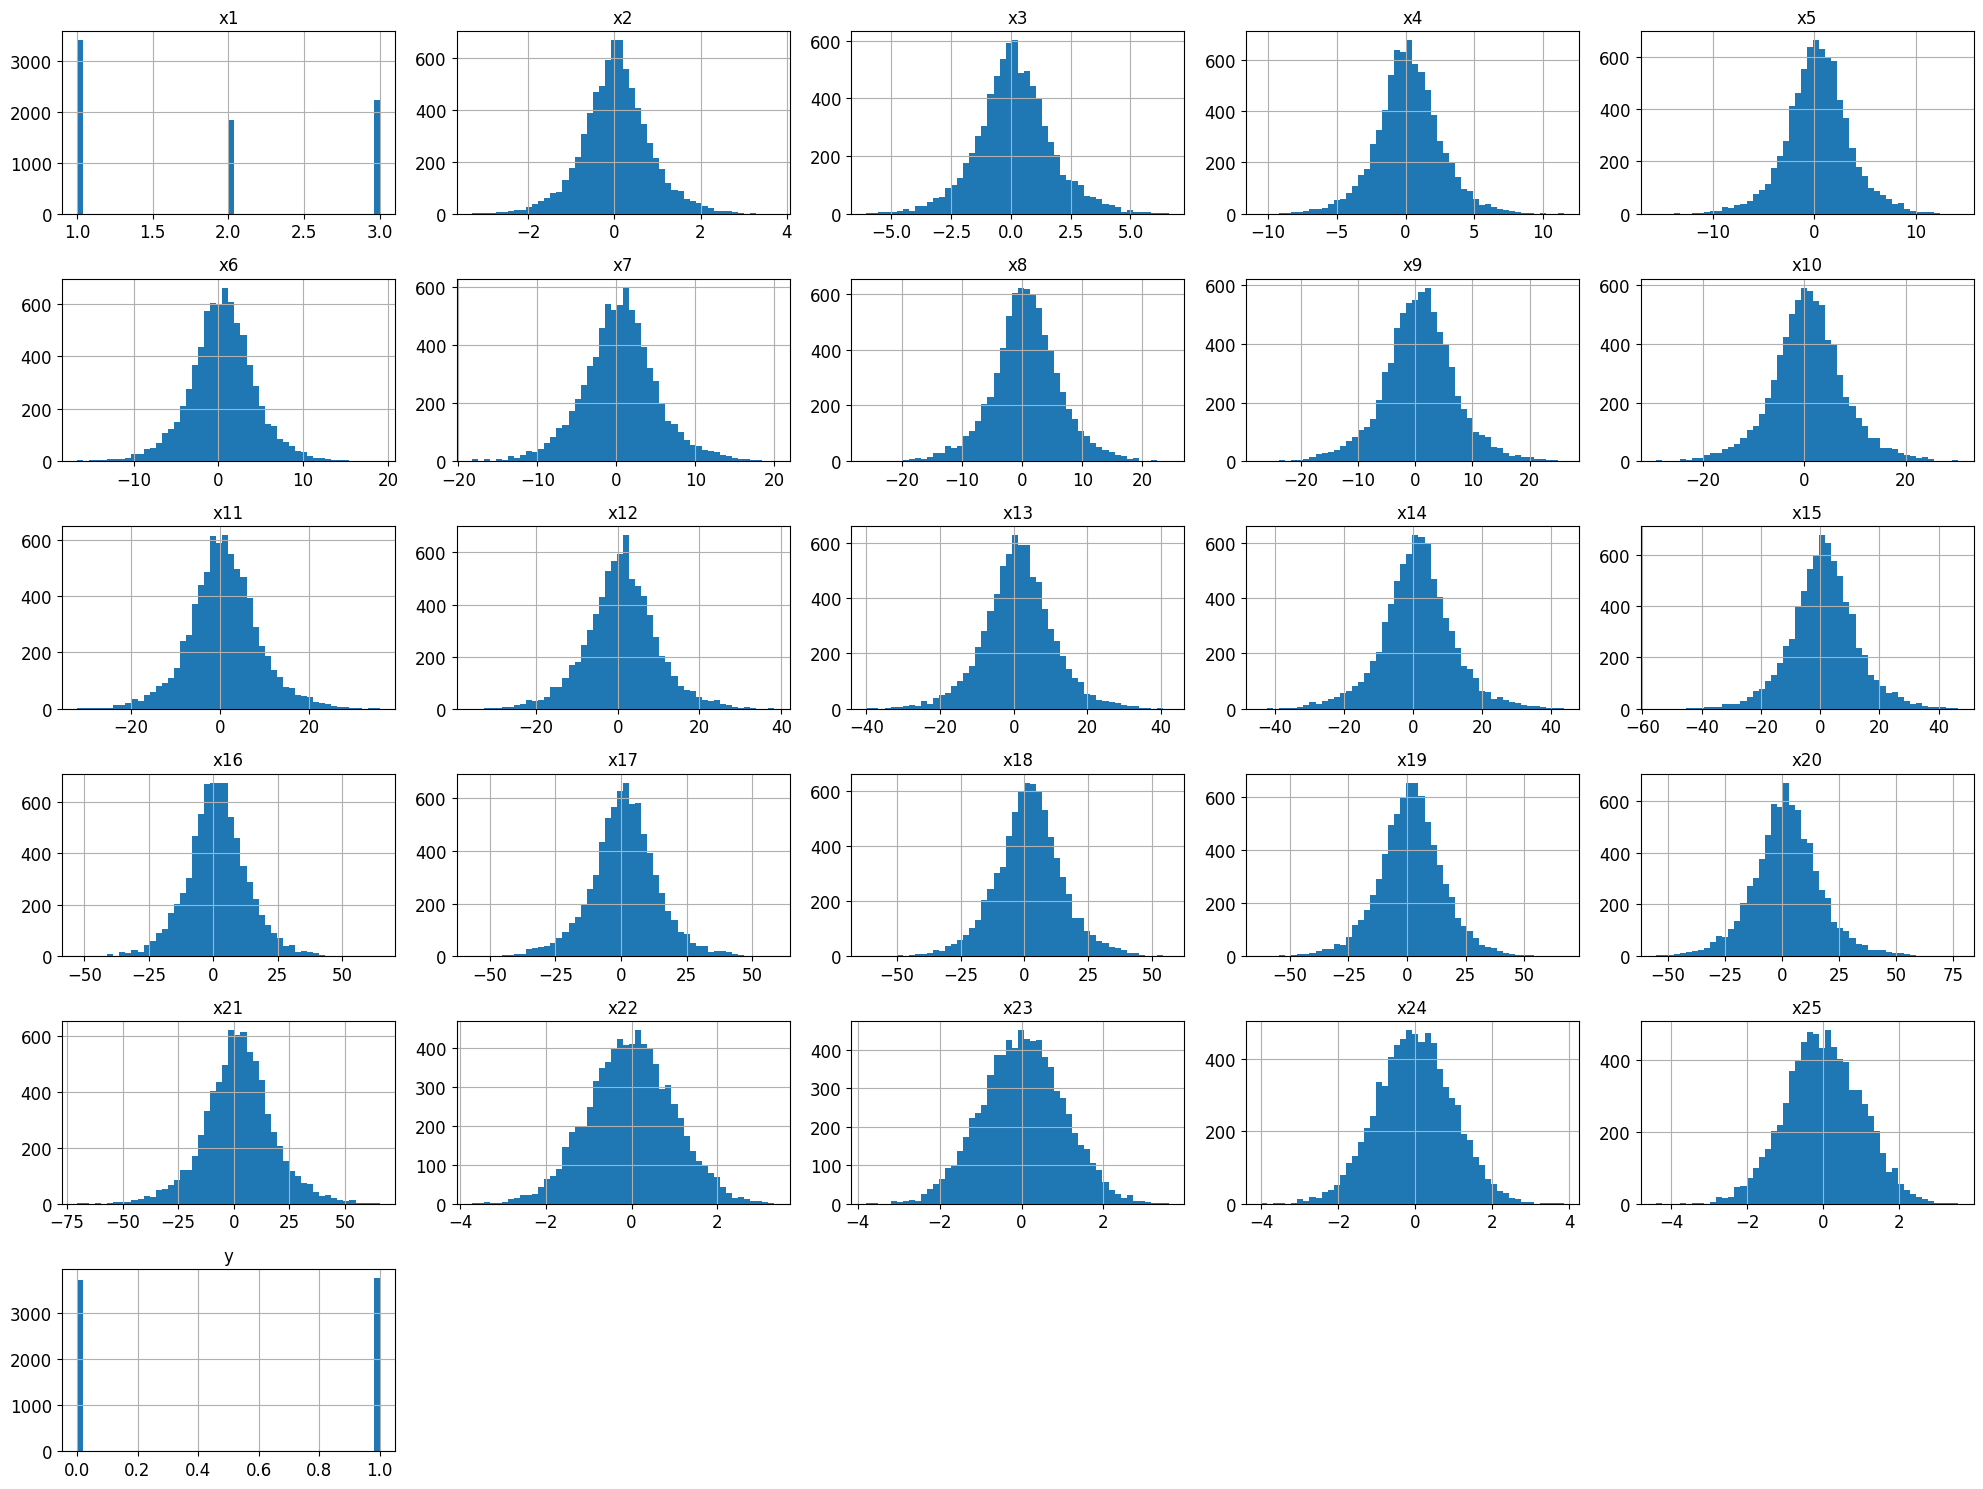

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## 4. Handle both categorical and numerical attributes. And use pipelines to prepare data for later steps.

In [4]:
test_file = pd.read_csv("test.csv")

In [5]:
test_file.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
0,2.0,-0.613152,0.057537,-0.703764,-6.597655,0.785862,-2.014744,-5.054175,6.064085,-23.259645,...,6.056196,6.529007,23.012616,4.327298,9.848763,-0.078961,-0.959632,-0.330196,-0.956861,1.0
1,1.0,-0.150413,-0.709591,-0.968033,0.719020,0.436210,4.266212,1.959140,4.426983,0.763004,...,3.109054,1.253939,8.961757,-3.024114,1.945620,-2.701906,0.099406,1.135901,-0.964551,0.0
2,1.0,-0.235007,1.398007,-1.180083,3.431749,-0.469478,-2.908404,-1.338819,0.975100,6.445267,...,4.077140,-12.086285,-7.452212,0.218493,13.047915,-0.543290,0.285700,0.406578,-1.297373,0.0
3,1.0,-0.117395,0.583527,-2.655306,-2.287786,3.416374,-5.177780,-2.790711,7.278647,2.465074,...,1.538299,-5.489300,2.293191,11.411334,-0.858265,-0.642965,0.673220,-0.794137,0.416441,0.0
4,1.0,-0.529300,2.024603,-1.831222,-3.549793,1.363971,-1.666152,-0.442674,-4.780260,2.631881,...,-5.298938,-7.772798,13.352563,15.010013,-3.228751,1.234885,0.548849,0.231534,-1.234757,0.0


In [6]:
cat = df[["x1"]]

In [7]:
cat.head(10)

,x1
0,1.0
1,1.0
2,2.0
3,3.0
4,1.0
5,2.0
6,3.0
7,3.0
8,2.0
9,1.0


In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(cat)

In [9]:
cat_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [10]:
cat_1hot.toarray()[0]

array([1., 0., 0.])

In [11]:
cat_1hot.toarray().shape

(7500, 3)

In [12]:
cat_encoder.categories_

[array([1., 2., 3.])]

In [13]:
cat_num = df.drop("x1", axis=1)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_train = num_pipeline.fit_transform(cat_num)

In [15]:
num_train

array([[-0.03102588, -0.49965362, -0.46848631, ...,  0.43726467,
         0.75993999, -1.00588398],
       [-0.27236566, -0.58107878,  0.05711203, ...,  0.02877593,
         1.84299915, -1.00588398],
       [-2.11948851,  0.50626097, -1.82553686, ..., -0.85619149,
         1.10948128,  0.99415044],
       ...,
       [ 0.14380695,  1.44877003, -1.71576374, ...,  1.77023572,
        -0.54691137,  0.99415044],
       [ 0.10448922, -0.03583527, -0.65691495, ...,  0.46657421,
         2.18743485, -1.00588398],
       [ 0.02863038, -0.23754542,  0.78398548, ...,  0.72593908,
        -1.07779171,  0.99415044]])

In [16]:
from sklearn.compose import ColumnTransformer

num_attribs = list(cat_num)
cat_attribs = list(cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

cat_prepared = full_pipeline.fit_transform(df)

In [17]:
cat_prepared

array([[-0.03102588, -0.49965362, -0.46848631, ...,  1.        ,
         0.        ,  0.        ],
       [-0.27236566, -0.58107878,  0.05711203, ...,  1.        ,
         0.        ,  0.        ],
       [-2.11948851,  0.50626097, -1.82553686, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.14380695,  1.44877003, -1.71576374, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.10448922, -0.03583527, -0.65691495, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.02863038, -0.23754542,  0.78398548, ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
cat_prepared.shape

(7500, 28)

In [19]:
x_train = df.iloc[0:7500, :25]
y_train = cat_num['y']

In [20]:
x_train.shape

(7500, 25)

In [21]:
y_train.shape

(7500,)

In [22]:
x_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,1.0,0.026761,-0.620259,-0.892886,1.171058,-1.932229,-5.153764,-2.129748,2.313411,-2.009202,...,-7.057395,11.882210,9.884163,-10.344449,11.634817,15.934457,-1.004876,-0.559616,0.425215,0.755477
1,1.0,-0.165811,-0.748739,0.351256,0.345646,-3.694768,-1.859598,3.141265,-1.101936,2.876558,...,2.591090,16.661572,5.165378,14.950746,0.156548,-24.005558,-0.760881,2.703514,0.020142,1.833380
2,2.0,-1.639684,0.966960,-4.105156,-7.102068,-10.245937,-6.495981,-5.775185,4.720946,-4.664918,...,-14.741211,16.799698,-15.435145,10.807349,9.535390,-1.323079,0.572417,0.797471,-0.857424,1.103354
3,3.0,0.392119,0.201262,-0.808156,1.699695,0.468696,9.358398,-5.689655,-3.418913,3.456031,...,-25.175711,-3.148217,0.918380,21.656966,14.706890,35.167532,0.399151,-0.763947,0.288066,-0.589866
4,1.0,-0.362154,1.096581,-2.209181,1.430510,-3.040553,-0.556315,-3.125322,8.309720,-5.227715,...,12.457347,2.679380,3.466357,2.885528,7.154526,-3.024414,0.745007,-0.081027,-1.536186,-0.273531


## 6. Try 3 different promising classifiers, and use these classifiers to obtain a soft-voting classifier.

#### • Report the recall, precision and accuracy of each of these classifiers.
#### • Use 3-fold cross-validation for this step.

## Classifier 1: Random Forest Classifier

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [24]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3)

array([0.9572, 0.9596, 0.9596])

## 5. Report the importance of each attribute by using the random forest classifier.

### Feature Importance of Each Attribute using the Random Forest Classifier

In [26]:
# Get feature importances
feature_importances = rnd_clf.feature_importances_

# Get the names of the features (assuming you have them in a list)
feature_names = x_train.columns

# Create a dictionary to store feature names and their corresponding importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance in decreasing order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

x1: 0.320154820711044
x3: 0.06115837646987678
x16: 0.04878596246974071
x4: 0.04449211466737352
x9: 0.041247980595846355
x10: 0.03766345679918523
x8: 0.036945578827744456
x17: 0.036845220928647365
x15: 0.03637987836106532
x7: 0.03495465855931383
x2: 0.034593989794999815
x21: 0.034083212315787356
x14: 0.029613079826701572
x5: 0.028785959396965086
x13: 0.026025849569637563
x11: 0.024747402093579268
x19: 0.024675275274838926
x20: 0.022521857467084634
x6: 0.017151462393484657
x18: 0.01560830626672101
x12: 0.014991090528760846
x25: 0.00766930223026992
x24: 0.007396943033410795
x23: 0.006798218275402665
x22: 0.00671000314251839


## 7. Explore the above 4 classifiers on the recall and precision, and find a classifier that suits our purpose the most.

### • Plot the ROC curves for these classifiers.
### • Calculate the ROC AUC scores for these classifiers.
### • Plot the precision versus recall for these classifiers

### ROC for Random Forest Classifier

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.9422733077905492

In [29]:
recall_score(y_train, y_train_pred)

0.9779957582184517

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.9598022635618577

In [31]:
y_scores = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)

ROC Curve:

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

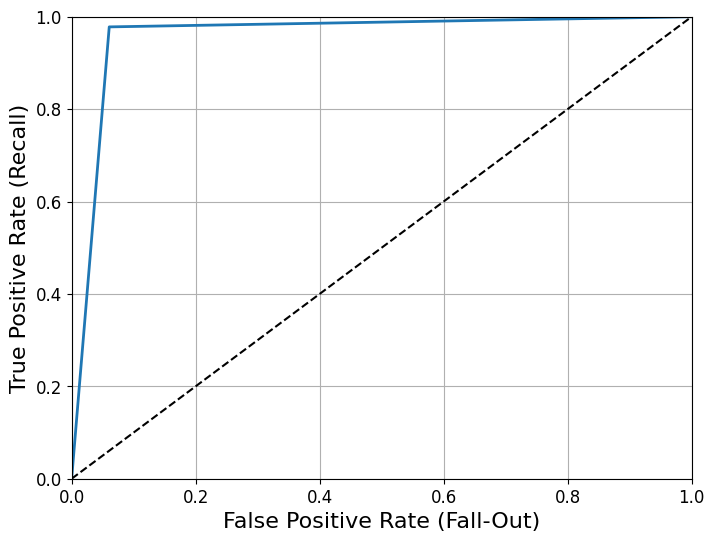

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown

# fill in code
plot_roc_curve(fpr, tpr)

plt.show()

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9586867203109426

Precision and Recall Curve

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

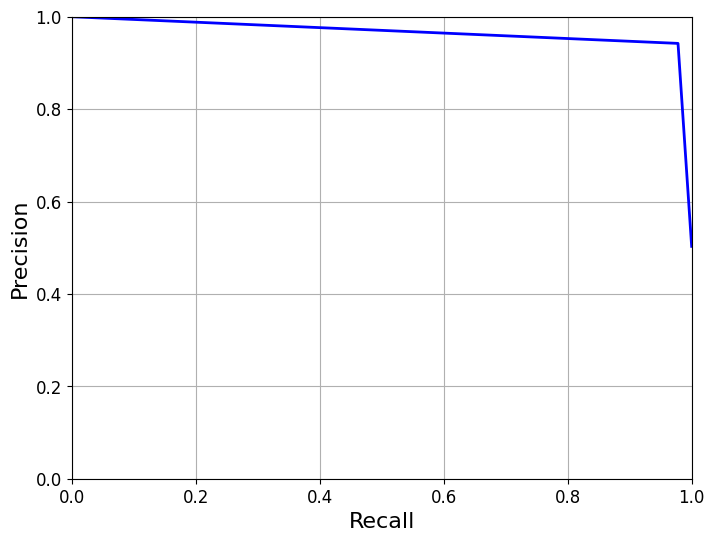

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))

# fill in code
plot_precision_vs_recall(precisions, recalls)

plt.show()

Classifier 2: SGDC

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# only use the first 1000 training sample to save time
sgd_classifier.fit(X_train_scaled[:1000], y_train[:1000]) 

SGDClassifier(random_state=42)

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8304, 0.8316, 0.8176])

In [40]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3)

In [41]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.8198291483303132

In [42]:
recall_score(y_train, y_train_pred)

0.8396076352067868

In [43]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.8296005239030778

In [44]:
y_scores = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3, n_jobs=-1)

ROC Curve:

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

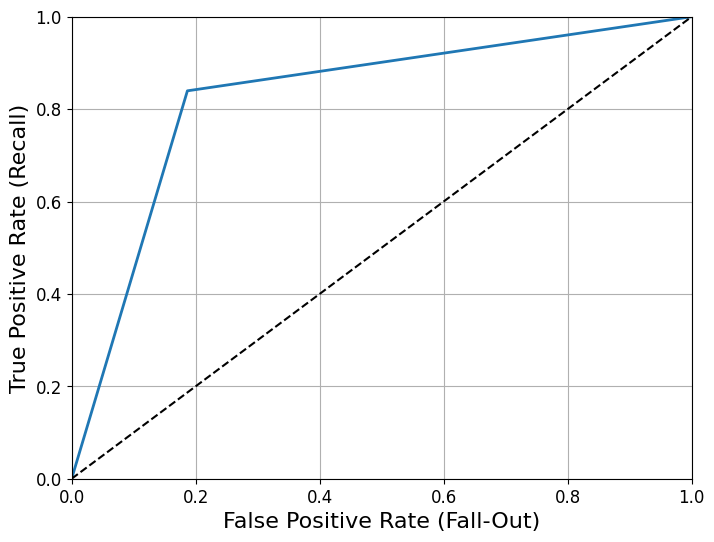

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown

# fill in code
plot_roc_curve(fpr, tpr)

plt.show()

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.8264561781184148

Precision and Recall Curve

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

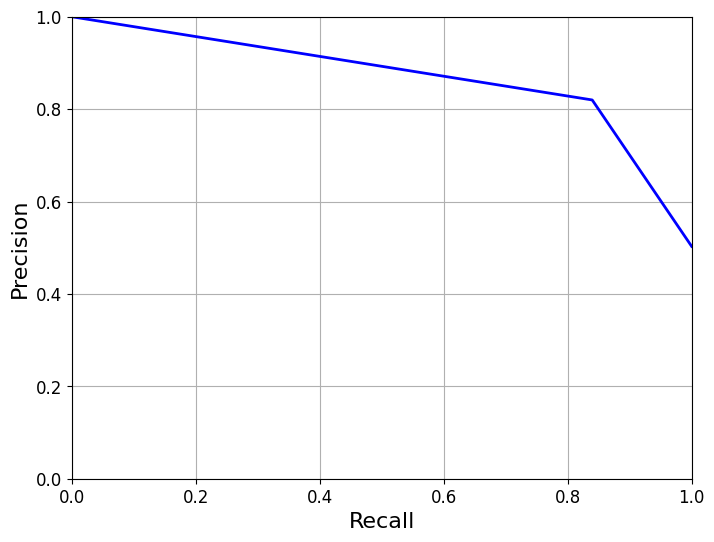

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))

# fill in code
plot_precision_vs_recall(precisions, recalls)

plt.show()

Classifier 3: SVC

In [50]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42, probability=True))

In [51]:
cross_val_score(ovr_clf, X_train_scaled, y_train, cv=3)

array([0.9824, 0.9852, 0.9848])

In [52]:
from sklearn.model_selection import cross_val_predict

y_train_pred_SVC = cross_val_predict(ovr_clf, X_train_scaled, y_train, cv=3)

In [53]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_SVC)


0.9887610382659887

In [54]:
recall_score(y_train, y_train_pred_SVC)

0.9795864262990456

In [55]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred_SVC)

0.9841523505127181

In [56]:
y_scores_SVC = cross_val_predict(ovr_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)

ROC Curve:

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_SVC)

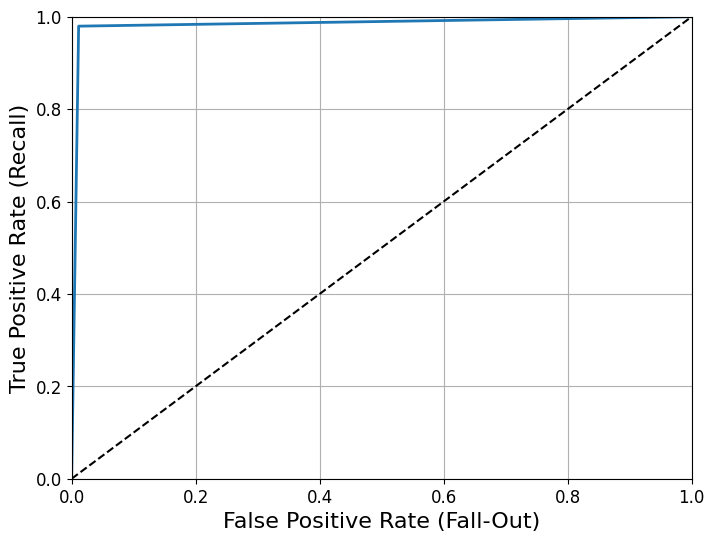

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown

# fill in code
plot_roc_curve(fpr, tpr)

plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores_SVC)

0.9841601659392224

Precision and Recall Curve

In [60]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_SVC)

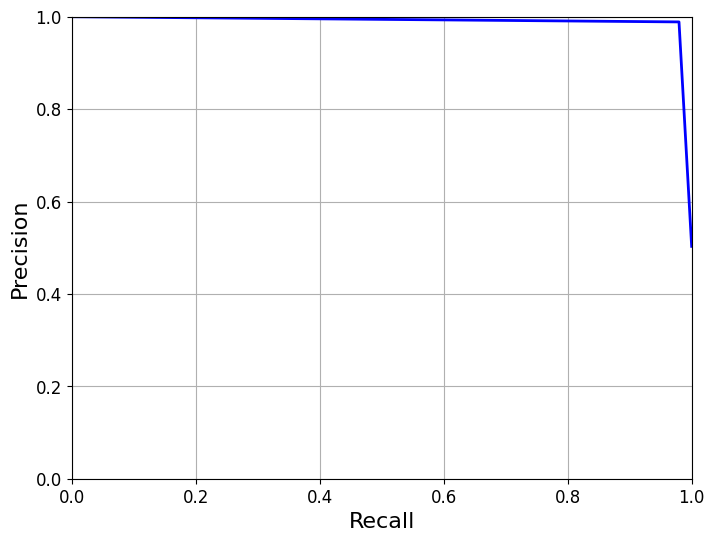

In [61]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))

# fill in code
plot_precision_vs_recall(precisions, recalls)

plt.show()

Classifier 4: MLP

In [62]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=42)

In [63]:
cross_val_score(mlp_clf, X_train_scaled, y_train, cv=3)

array([0.98  , 0.9844, 0.98  ])

In [64]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mlp_clf, X_train_scaled, y_train, cv=3)

In [65]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.9876510067114094

In [66]:
recall_score(y_train, y_train_pred)

0.9753446447507953

In [67]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.9814592503668134

In [68]:
y_scores = cross_val_predict(mlp_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)

ROC Curve:

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

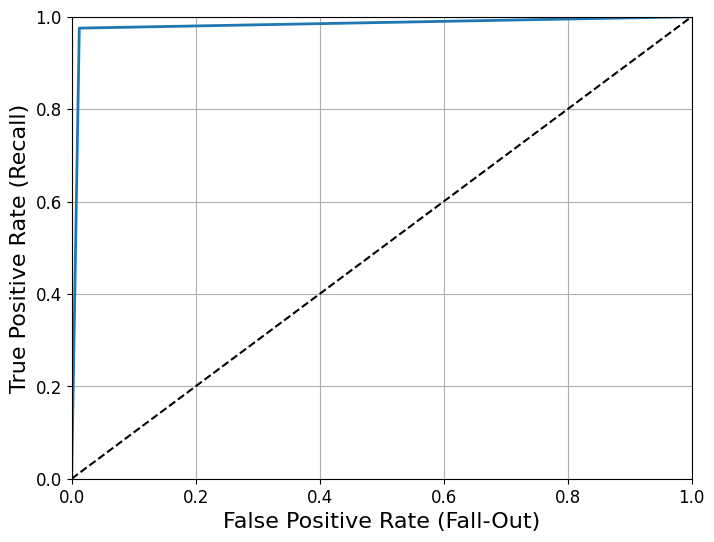

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown

# fill in code
plot_roc_curve(fpr, tpr)

plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9815027944784019

Precision and Recall Curve

In [72]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

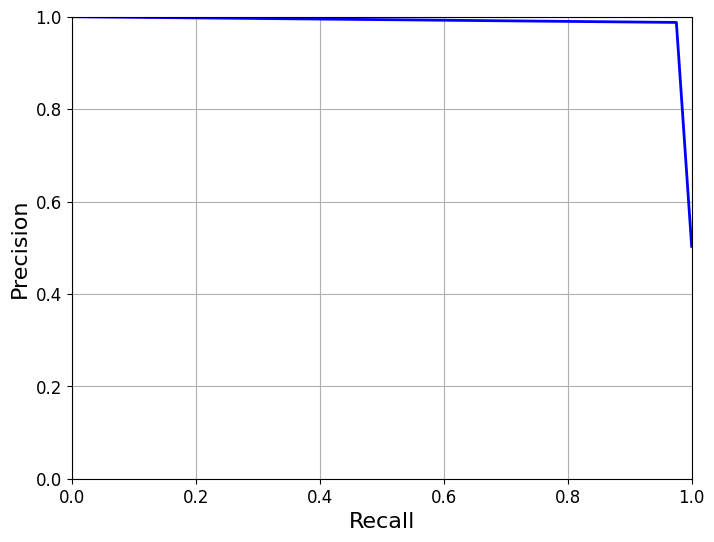

In [73]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))

# fill in code
plot_precision_vs_recall(precisions, recalls)

plt.show()

Soft Voting

In [74]:
from sklearn.ensemble import VotingClassifier

voting_clf_soft = VotingClassifier(
    estimators=[('rf', rnd_clf), ('mlp', mlp_clf), ('svc', ovr_clf)],
    voting='soft')

voting_clf_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42)),
                             ('svc',
                              OneVsRestClassifier(estimator=SVC(gamma='auto',
                                                                probability=True,
                                                                random_state=42)))],
                 voting='soft')

In [75]:
cross_val_score(voting_clf_soft, X_train_scaled, y_train, cv=3)

array([0.9876, 0.9868, 0.9852])

## 8. Choose the best classifier that suits our purpose, and train the classifier using the training data

### The best classifier suited for our purpose was SVC.

## 9. Use the test data from test.csv to check whether we can achieve the proposed requirement on recall and precision.

In [76]:
cat_svc = test_file[["x1"]]

In [77]:
num_svc = test_file.drop("x1", axis=1)

In [78]:
x_svc = test_file.iloc[0:2500, :25]
y_svc = num_svc["y"]

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_SVC = scaler.fit_transform(x_svc.astype(np.float64))

In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovr_clf, X_train_scaled_SVC, y_svc, cv=3, scoring="accuracy")

array([0.98441247, 0.98319328, 0.98079232])

In [81]:
from sklearn.model_selection import cross_val_predict
y_train_pred_SVC = cross_val_predict(ovr_clf, X_train_scaled_SVC, y_svc, cv=3)

In [82]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_svc, y_train_pred_SVC)

0.9884583676834295

In [83]:
recall_score(y_svc, y_train_pred_SVC)

0.9763843648208469

In [84]:
from sklearn.metrics import f1_score
f1_score(y_svc, y_train_pred_SVC)

0.9823842687423188

## Conclusion:

It is clear that SVC is the best because the precision score is at 98.8% and the recall score is 97.6%.